In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.cross_validation import  cross_val_score
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
train_set=pd.read_csv('JPM1.csv')
test_set=pd.read_csv('JPM_test.csv')

In [76]:
y=train_set['MACD'].astype(int)
X=train_set.drop(labels=['MACD','Average_Loss','Loss','Volume','Open','High'],axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [6]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.9122137404580153


[[479   0]
 [ 45   0]]


In [81]:
param_grid = {'C': [0.0001,0.01,0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [13]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [83]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.0001, gamma=0.01, kernel=rbf ......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9142156862745098, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.9187192118226601, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.916256157635468, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.8848039215686274, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf .........

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    4.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [84]:
grid.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}

In [85]:
grid.best_estimator_

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
grid_predictions = grid.predict(X_test)

In [87]:
print(confusion_matrix(y_test,grid_predictions))

[[479   0]
 [ 45   0]]


In [48]:
test_set.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,Gain,Loss,Average_Gain,Average_Loss,Relative_Strength,RSI,CMF,MFI
0,87.339996,87.760002,85.980003,87.230003,84.842056,20550700,83.280018,82.601443,0.000000,0.319999,0.342857,0.189285,1.811323,64.429563,-0.303375,63.727049
1,86.959999,87.180000,86.400002,86.910004,84.998543,15266600,83.480908,82.829738,0.000000,0.800003,0.342857,0.244286,1.403508,58.394155,-0.321288,56.475949
2,86.809998,87.110001,85.260002,86.110001,84.216133,14300800,83.621767,82.961776,0.010002,0.000000,0.252857,0.244286,1.035089,50.862091,-0.343073,54.813426
3,86.389999,86.620003,85.940002,86.120003,84.225914,12893300,83.744634,83.082170,0.059997,0.000000,0.257143,0.168571,1.525423,60.402671,-0.379267,56.553218
4,85.730003,86.769997,85.519997,86.180000,84.284584,12735600,83.819372,83.196685,0.250000,0.000000,0.240000,0.168571,1.423729,58.741259,-0.392489,66.024773


In [70]:
grid_predictions1=grid.predict(test_set.drop(labels=['Average_Loss','Loss','Volume'],axis=1))

In [21]:
comp=pd.read_csv('JPM_test_OP.csv')

In [71]:
print(confusion_matrix(comp['MACD'],grid_predictions1))

[[233   0]
 [ 17   0]]


In [74]:
corr=train_set.drop(labels=['Average_Loss','Loss','Volume','Open','High','Low','Close'],axis=1).corr()

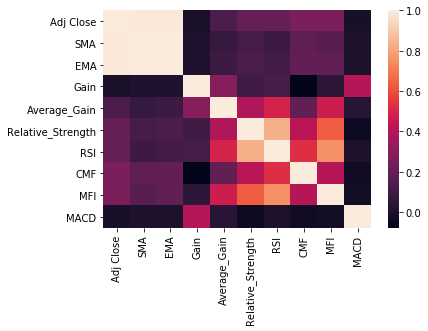

In [75]:
sns.heatmap(corr)